This is my final notebook that I will use to show all my work.

First I am importing everything I will need to make my calculations and visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


These next lines of code are how we (Pedro and I) made the master dataframe that we used to extract information from. To be frank, almost all of it was done by Pedro. Not because I did nothing, but because I used only the datasets provided on Canvas. That dataset was far more limited after my data cleaning, having less than 700 movies. As this was limited, and only had basic financial information, not even information like genre, director, studio. While I did merge my initial dataframe with Pedro's, it still was not very good as I could only expand the information on the roughly 700 movies I had. So by Wednesday, I decided to use Pedro's dataframe, using his information scraped from IMDB's list of the top 200 Grossing Movies from 2012-2022. However, I did clean and adjsut the dataset for my own specific analysis and criteria.

In [2]:
for year in range(2012, 2023):
    globals()[f"box_office_{year}"] = pd.read_excel("/Users/Arsh/Downloads/IMDB_boxoffice_2022_2012.xlsx", sheet_name = str(year), na_values = "-" )

In [3]:
for year in range(2012, 2023):
    globals()[f"box_office_{year}"]["release_year"] = year

In [4]:
box_office_decade = pd.concat([box_office_2012,
           box_office_2013,
           box_office_2014,
           box_office_2015,
           box_office_2016,
           box_office_2017,
           box_office_2018,
           box_office_2019,
           box_office_2020,
           box_office_2021,
           box_office_2022], ignore_index=True)

In [5]:
box_office_decade.groupby("release_year").count()

,Rank,Release,Genre,Budget,Running Time,Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Estimated
release_year,,,,,,,,,,,,,,
2012,200,200,0,0,0,200,198,195,193,195,200,199,199,200
2013,200,200,0,0,0,200,200,199,198,199,200,198,197,200
2014,200,200,0,0,0,200,200,200,200,200,200,199,198,200
2015,200,200,0,0,0,200,200,198,194,198,200,199,198,200
2016,200,200,0,0,0,200,200,199,198,199,200,196,198,200
2017,200,200,0,0,0,200,200,196,196,196,200,198,198,200
2018,200,200,0,0,0,200,200,198,197,198,200,198,192,200
2019,200,200,0,0,0,200,199,197,196,197,200,136,196,200
2020,200,200,0,0,0,200,195,184,153,180,200,6,198,200


In [6]:
box_office_decade.rename(columns = {"Release": "primary_title"}, inplace= True)
box_office_decade.drop(columns = "Estimated", inplace = True)

In [7]:
con = sqlite3.connect('/Users/Arsh/Downloads/im.db')

cursor = con.cursor()


# Execute the query
# (This is a special query for finding the table names. You don't need to memorize it.)
cursor.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names

table_names = cursor.fetchall()

table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [8]:
movie_basics = pd.read_sql("""

SELECT  *
FROM movie_basics


""", con)

In [9]:
movies = pd.merge(box_office_decade, movie_basics, how = "inner", on = "primary_title")

In [10]:
movies.drop(columns= ["start_year", "original_title", "Genre", "Budget", "Running Time"], inplace= True)

In [11]:
movies["genre1"] = movies["genres"].str.split(',', expand = True)[0]
movies["genre2"] = movies["genres"].str.split(',', expand = True)[1]
movies["genre3"] = movies["genres"].str.split(',', expand = True)[2]
movies.drop(columns= ["genres", "% of Total"], inplace= True)

In [12]:
movies_clean = movies
movies_clean.drop(columns = ["Max Th", "Opening", "Open Th"])

,Rank,primary_title,Gross,Open,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3
0,1,The Avengers,623357910,2022-05-04,Oct 4,Walt Disney Studios Motion Pictures,2012,tt0848228,143.0,Action,Adventure,Sci-Fi
1,2,The Dark Knight Rises,448139099,2022-07-20,Dec 13,Warner Bros.,2012,tt1345836,164.0,Action,Thriller,None
2,3,The Hunger Games,408010692,2022-03-23,Sep 6,Lionsgate,2012,tt1392170,142.0,Action,Adventure,Sci-Fi
3,4,Skyfall,304360277,2022-11-09,Mar 10,Sony Pictures Entertainment (SPE),2012,tt1074638,143.0,Action,Adventure,Thriller
4,5,The Hobbit: An Unexpected Journey,303003568,2022-12-14,Apr 25,Warner Bros.,2012,tt0903624,169.0,Adventure,Family,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...
2436,193,The Territory,26464,2022-08-19,NaN,Picturehouse Entertainment,2022,tt2574238,40.0,Documentary,News,None
2437,194,The Innocents,25705,2022-05-13,NaN,IFC Films,2022,tt4370784,115.0,Drama,History,None
2438,194,The Innocents,25705,2022-05-13,NaN,IFC Films,2022,tt4677348,98.0,Horror,None,None
2439,198,1982,23241,2022-06-10,NaN,Tricycle Logic,2022,tt2388621,90.0,Drama,None,None


In [13]:
movies_clean["release_month"] = movies_clean["Open"].apply(lambda x: x.strftime("%b"))

In [14]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

movies_clean['month'] = pd.Categorical(movies_clean['release_month'], categories=months, ordered=True)

movies_clean.sort_values(by="month",inplace=True) 

In [15]:
budgets = pd.read_excel("/Users/Arsh/Downloads/tn_movie_budgets.xlsx")

budgets

,primary_title,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
5777,Red 11,7000,0,0
5778,Following,6000,48482,240495
5779,Return to the Land of Wonders,5000,1338,1338
5780,A Plague So Pleasant,1400,0,0


In [16]:
movies_clean = pd.merge(movies_clean, budgets, how = "left", on = "primary_title")

In [17]:
directors = pd.read_sql("""

SELECT  *
FROM directors


""", con)

directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [18]:
persons = pd.read_sql("""

SELECT  person_id, primary_name
FROM persons


""", con)

persons

,person_id,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


In [19]:
movie_directors = pd.merge(directors, persons, how = "inner", on = "person_id")

In [20]:
movies = pd.merge(movies_clean, movie_directors, how = "left", on = "movie_id").drop_duplicates(subset="primary_title")

movies.rename(columns = {"primary_name": "director"}, inplace= True)

movies['production_budget'].fillna(int(movies['production_budget'].mean()), inplace=True)

movies['worldwide_gross'].fillna(int(movies['worldwide_gross'].mean()), inplace=True)

movies['director'].fillna("Praveen Gowtham", inplace=True)

movies["profit"] = movies.worldwide_gross - movies.production_budget

movies["profit_margin"] = ((movies.worldwide_gross - movies.production_budget)/movies.worldwide_gross)* 100

movies["profitable"] = movies["profit"] > 0

In [21]:
movies.shape

(1704, 25)

In [22]:
movies2 = movies.drop('Rank', axis = 1)
movies2 = movies2.drop('month', axis = 1)
movies2 = movies2.drop('movie_id', axis = 1)
movies2 = movies2.drop('domestic_gross', axis = 1)
movies2 = movies2.drop('Open', axis = 1)
movies2 = movies2.drop('Close', axis = 1)
movies2 = movies2.drop('genre3', axis = 1)
movies2 = movies2.drop('Max Th', axis = 1)
movies2 = movies2.drop('Open Th', axis = 1)
movies2 = movies2.drop('Opening', axis = 1)
movies2.shape

(1704, 15)

In [23]:
movies2.isna().sum()

primary_title          0
Gross                  0
Distributor           24
release_year           0
runtime_minutes      211
genre1                12
genre2               326
release_month          0
production_budget      0
worldwide_gross        0
person_id             18
director               0
profit                 0
profit_margin          0
profitable             0
dtype: int64

In [24]:
movies2['runtime_minutes'].fillna(movies2['runtime_minutes'].mean(), inplace=True)
movies2.isna().sum()

primary_title          0
Gross                  0
Distributor           24
release_year           0
runtime_minutes        0
genre1                12
genre2               326
release_month          0
production_budget      0
worldwide_gross        0
person_id             18
director               0
profit                 0
profit_margin          0
profitable             0
dtype: int64

In [25]:
movies2.loc[movies2['production_budget'] <= 5000000, 'budget_tier'] = 'low_tier'
movies2.loc[movies2['production_budget'] >= 50000000, 'budget_tier'] = 'high_tier'
movies2['budget_tier'] = movies2['budget_tier'].fillna('mid_tier')
movies2.loc[movies2['runtime_minutes'] <= 90, 'movie_length'] = 'short'
movies2.loc[movies2['runtime_minutes'] >= 150, 'movie_length'] = 'long'
movies2['movie_length'] = movies2['movie_length'].fillna('normal')
movies2 = movies2.sort_values(by='profit_margin', ascending = False)
movies2.head(20)

,primary_title,Gross,Distributor,release_year,runtime_minutes,genre1,genre2,release_month,production_budget,worldwide_gross,person_id,director,profit,profit_margin,profitable,budget_tier,movie_length
3832,The Gallows,22764410,Warner Bros.,2015,81.000000,Horror,Mystery,Jul,100000.0,41656474.0,nm4000389,Travis Cluff,41556474.0,99.759941,True,low_tier,short
899,The Devil Inside,53261944,Paramount Pictures,2012,83.000000,Horror,None,Jan,1000000.0,101759490.0,nm0068587,William Brent Bell,100759490.0,99.017291,True,low_tier,short
2347,Unfriended,32482090,Universal Pictures,2015,83.000000,Horror,Mystery,Apr,1000000.0,64364198.0,nm0300174,Levan Gabriadze,63364198.0,98.446341,True,low_tier,short
29,Split,138291365,Universal Pictures,2017,107.060951,Crime,None,Jan,5000000.0,278964806.0,nm3334461,Robbie Walsh,273964806.0,98.207659,True,low_tier,normal
1032,Get Out,176040665,Universal Pictures,2017,104.000000,Horror,Mystery,Feb,5000000.0,255367951.0,nm1443502,Jordan Peele,250367951.0,98.042041,True,low_tier,normal
5518,Moonlight,27854932,A24,2016,87.000000,Horror,None,Oct,1500000.0,65245512.0,nm2699710,Jill Wong,63745512.0,97.700991,True,low_tier,short
3151,Chernobyl Diaries,18119640,Warner Bros.,2012,86.000000,Horror,Mystery,May,1000000.0,42411721.0,nm0662086,Bradley Parker,41411721.0,97.642161,True,low_tier,short
5644,Annabelle,84273813,Warner Bros.,2014,99.000000,Horror,Mystery,Oct,6500000.0,256862920.0,nm0502954,John R. Leonetti,250362920.0,97.469467,True,mid_tier,normal
6486,Dangal,12391761,UTV Motion Pictures,2016,161.000000,Action,Biography,Dec,9500000.0,294654618.0,nm4318159,Nitesh Tiwari,285154618.0,96.775886,True,mid_tier,long
3573,The Purge,64473115,Universal Pictures,2013,85.000000,Horror,Thriller,Jun,3000000.0,91266581.0,nm0218621,James DeMonaco,88266581.0,96.712926,True,low_tier,short


This is the point at which Pedro and I decided to make 1 single dataframe to work from, as the number of movies that we has had differed greatly. 

In [26]:
df = movies2

In [27]:
df.to_csv('thecsv', index=0)

I saved the dataframe here as this was the end of Tuesday, and I figured that I would start on doing the data wrangling and visualizations on Wednesday.

In [28]:
df = pd.read_csv('/Users/Arsh/Flatiron/Phase 1 Film Project/thecsv')
df.shape

(1692, 17)

In [29]:
df.drop('person_id', axis=1, inplace=True)

In [30]:
values = ['War', 'Family', 'Western', 'Romance', 'Musical']
df = df[df.genre1.isin(values) == False]

I am now just limiting my dataset to only the profitable movies from the master df.

In [31]:
df = df[df['profitable'] == 1].sort_values(by='profit_margin', ascending = False)
df

,primary_title,Gross,Distributor,release_year,runtime_minutes,genre1,genre2,release_month,production_budget,worldwide_gross,director,profit,profit_margin,profitable,budget_tier,movie_length
0,The Gallows,22764410,Warner Bros.,2015,81.00000,Horror,Mystery,Jul,100000.0,41656474.0,Travis Cluff,41556474.0,99.759941,True,low_tier,short
1,The Devil Inside,53261944,Paramount Pictures,2012,83.00000,Horror,NaN,Jan,1000000.0,101759490.0,William Brent Bell,100759490.0,99.017291,True,low_tier,short
2,Unfriended,32482090,Universal Pictures,2015,83.00000,Horror,Mystery,Apr,1000000.0,64364198.0,Levan Gabriadze,63364198.0,98.446341,True,low_tier,short
3,Split,138291365,Universal Pictures,2017,107.11193,Crime,NaN,Jan,5000000.0,278964806.0,Robbie Walsh,273964806.0,98.207659,True,low_tier,normal
4,Get Out,176040665,Universal Pictures,2017,104.00000,Horror,Mystery,Feb,5000000.0,255367951.0,Jordan Peele,250367951.0,98.042041,True,low_tier,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,Alex Cross,25888412,Lionsgate,2012,101.00000,Action,Crime,Oct,35000000.0,35426759.0,Rob Cohen,426759.0,1.204623,True,mid_tier,normal
1521,That's My Boy,36931089,Sony Pictures Entertainment (SPE),2012,116.00000,Comedy,NaN,Jun,57500000.0,58085235.0,Sean Anders,585235.0,1.007545,True,high_tier,normal
1522,Pan,35088320,Warner Bros.,2015,111.00000,Adventure,Comedy,Oct,150000000.0,151525973.0,Joe Wright,1525973.0,1.007070,True,high_tier,normal
1523,Firestarter,9589250,Universal Pictures,2022,94.00000,Documentary,NaN,May,15000000.0,15136870.0,Jamie Bailey,136870.0,0.904216,True,mid_tier,normal


Now i made subsets of the df based on budget tier so i can more easily wrangle and visualize data by movies grouped in each budget tier.

In [32]:
low =  df[df['budget_tier'] == 'low_tier'].sort_values(by='profit_margin', ascending = False)
low.shape

(106, 16)

In [33]:
low

,primary_title,Gross,Distributor,release_year,runtime_minutes,genre1,genre2,release_month,production_budget,worldwide_gross,director,profit,profit_margin,profitable,budget_tier,movie_length
0,The Gallows,22764410,Warner Bros.,2015,81.00000,Horror,Mystery,Jul,100000.0,41656474.0,Travis Cluff,41556474.0,99.759941,True,low_tier,short
1,The Devil Inside,53261944,Paramount Pictures,2012,83.00000,Horror,NaN,Jan,1000000.0,101759490.0,William Brent Bell,100759490.0,99.017291,True,low_tier,short
2,Unfriended,32482090,Universal Pictures,2015,83.00000,Horror,Mystery,Apr,1000000.0,64364198.0,Levan Gabriadze,63364198.0,98.446341,True,low_tier,short
3,Split,138291365,Universal Pictures,2017,107.11193,Crime,NaN,Jan,5000000.0,278964806.0,Robbie Walsh,273964806.0,98.207659,True,low_tier,normal
4,Get Out,176040665,Universal Pictures,2017,104.00000,Horror,Mystery,Feb,5000000.0,255367951.0,Jordan Peele,250367951.0,98.042041,True,low_tier,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,Hearts Beat Loud,2386251,Gunpowder & Sky,2018,97.00000,Comedy,Drama,Jun,2000000.0,2420962.0,Brett Haley,420962.0,17.388212,True,low_tier,normal
1483,The Resurrection of Gavin Stone,2303792,BH Tilt,2017,91.00000,Comedy,Drama,Jan,2000000.0,2303792.0,Dallas Jenkins,303792.0,13.186607,True,low_tier,normal
1489,The Diary of a Teenage Girl,1477002,Sony Pictures Classics,2015,102.00000,Comedy,Drama,Aug,2000000.0,2279959.0,Marielle Heller,279959.0,12.279124,True,low_tier,normal
1500,First Reformed,3448256,A24,2018,113.00000,Drama,Mystery,May,3500000.0,3874772.0,Paul Schrader,374772.0,9.672105,True,low_tier,normal


In [34]:
low['Distributor'].value_counts().head(10)

A24                       11
Universal Pictures        10
BH Tilt                    9
Lionsgate                  8
Roadside Attractions       6
Sony Pictures Classics     5
Paramount Pictures         5
Open Road Films (II)       5
IFC Films                  4
Warner Bros.               4
Name: Distributor, dtype: int64

In [35]:
mid =  df[df['budget_tier'] == 'mid_tier'].sort_values(by='profit_margin', ascending = False)
mid.shape

(403, 16)

In [36]:
mid['Distributor'].value_counts().head(10)

Universal Pictures                   51
Warner Bros.                         44
Lionsgate                            43
Twentieth Century Fox                30
Paramount Pictures                   23
Fox Searchlight Pictures             21
The Weinstein Company                21
Sony Pictures Entertainment (SPE)    19
Focus Features                       19
STX Entertainment                    17
Name: Distributor, dtype: int64

In [37]:
high = df[df['budget_tier'] == 'high_tier'].sort_values(by='profit_margin', ascending = False)
high.shape

(1007, 16)

After this, now I will start looking through the data to see relationships between different categories and profitability.

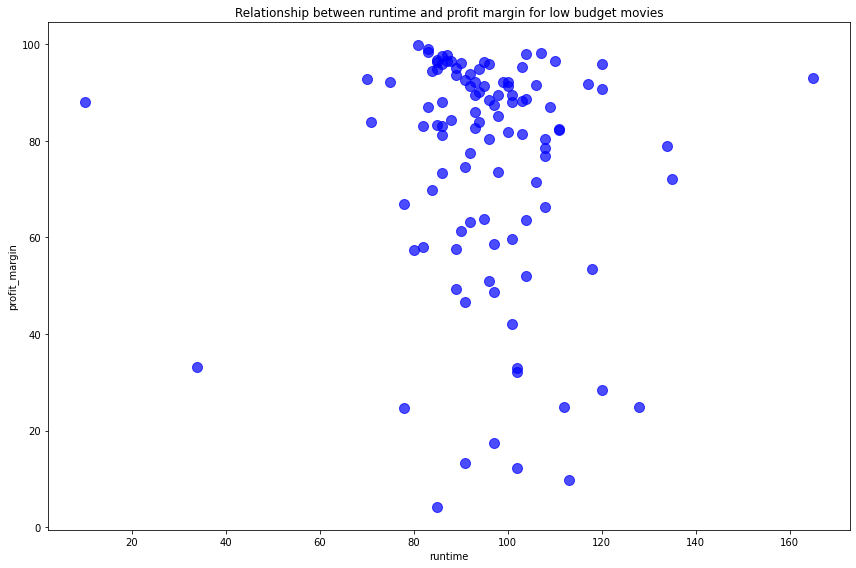

In [38]:
x = low['runtime_minutes']
y = low['profit_margin']
fig, ax = plt.subplots(figsize =(12,8))
ax.scatter(x, y, s=100, alpha = 0.7, color = 'blue')
ax.set_title('Relationship between runtime and profit margin for low budget movies')
ax.set_xlabel('runtime')
ax.set_ylabel('profit_margin')
plt.tight_layout();

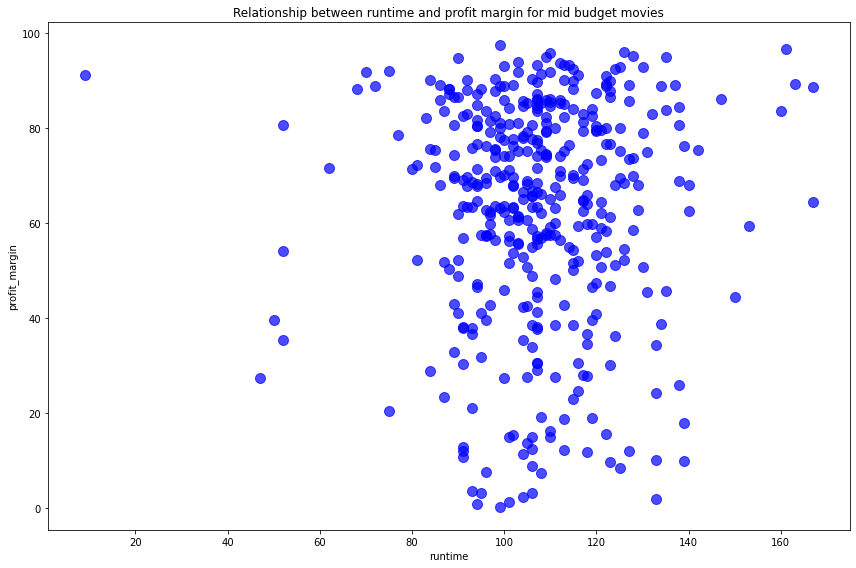

In [39]:
x = mid['runtime_minutes']
y = mid['profit_margin']
fig, ax = plt.subplots(figsize =(12,8))
ax.scatter(x, y, s=100, alpha = 0.7, color = 'blue')
ax.set_title('Relationship between runtime and profit margin for mid budget movies')
ax.set_xlabel('runtime')
ax.set_ylabel('profit_margin')
plt.tight_layout();

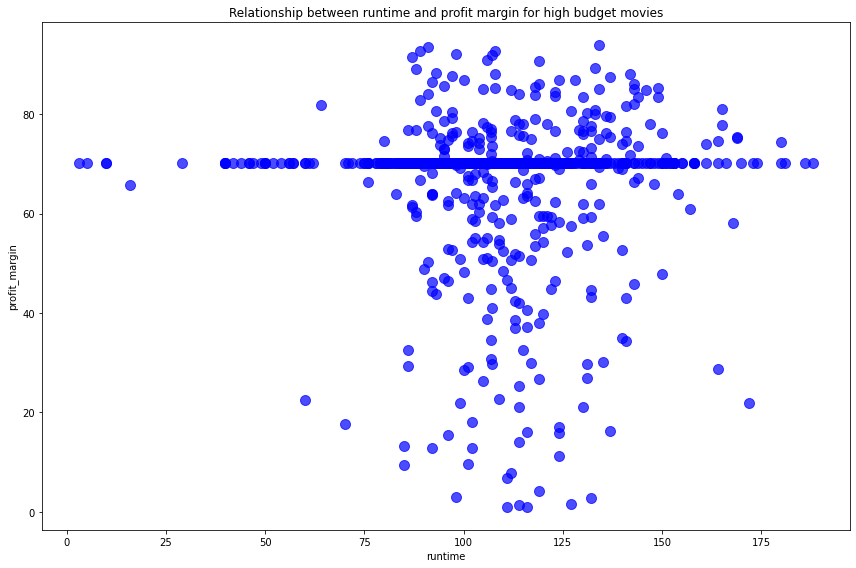

In [40]:
x = high['runtime_minutes']
y = high['profit_margin']
fig, ax = plt.subplots(figsize =(12,8))
ax.scatter(x, y, s=100, alpha = 0.7, color = 'blue')
ax.set_title('Relationship between runtime and profit margin for high budget movies')
ax.set_xlabel('runtime')
ax.set_ylabel('profit_margin')
plt.tight_layout();

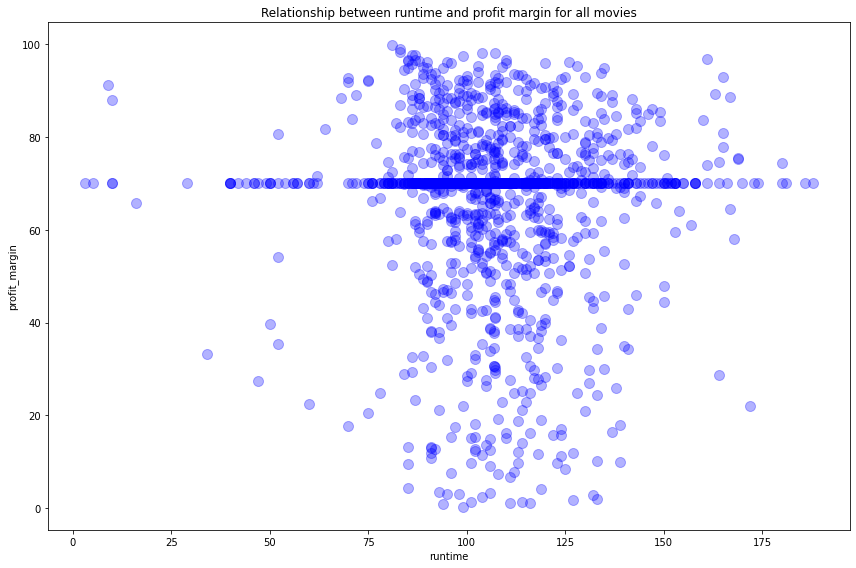

In [41]:
x = df['runtime_minutes']
y = df['profit_margin']
fig, ax = plt.subplots(figsize =(12,8))
ax.scatter(x, y, s=100, alpha = 0.3, color = 'blue')
ax.set_title('Relationship between runtime and profit margin for all movies')
ax.set_xlabel('runtime')
ax.set_ylabel('profit_margin')
plt.tight_layout();

Clearly there is no linear relationship between runtime and profit margin for movies, of any budget size. Also, because Pedro filled the NaN values with the averages of those columns, that is why those weird lines on the graph appear.

In [42]:
100 * low['movie_length'].value_counts(normalize=True)

normal    64.150943
short     34.905660
long       0.943396
Name: movie_length, dtype: float64

In [43]:
100 * df['movie_length'].value_counts(normalize=True)

normal    81.596306
short     15.039578
long       3.364116
Name: movie_length, dtype: float64

In [44]:
low

,primary_title,Gross,Distributor,release_year,runtime_minutes,genre1,genre2,release_month,production_budget,worldwide_gross,director,profit,profit_margin,profitable,budget_tier,movie_length
0,The Gallows,22764410,Warner Bros.,2015,81.00000,Horror,Mystery,Jul,100000.0,41656474.0,Travis Cluff,41556474.0,99.759941,True,low_tier,short
1,The Devil Inside,53261944,Paramount Pictures,2012,83.00000,Horror,NaN,Jan,1000000.0,101759490.0,William Brent Bell,100759490.0,99.017291,True,low_tier,short
2,Unfriended,32482090,Universal Pictures,2015,83.00000,Horror,Mystery,Apr,1000000.0,64364198.0,Levan Gabriadze,63364198.0,98.446341,True,low_tier,short
3,Split,138291365,Universal Pictures,2017,107.11193,Crime,NaN,Jan,5000000.0,278964806.0,Robbie Walsh,273964806.0,98.207659,True,low_tier,normal
4,Get Out,176040665,Universal Pictures,2017,104.00000,Horror,Mystery,Feb,5000000.0,255367951.0,Jordan Peele,250367951.0,98.042041,True,low_tier,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,Hearts Beat Loud,2386251,Gunpowder & Sky,2018,97.00000,Comedy,Drama,Jun,2000000.0,2420962.0,Brett Haley,420962.0,17.388212,True,low_tier,normal
1483,The Resurrection of Gavin Stone,2303792,BH Tilt,2017,91.00000,Comedy,Drama,Jan,2000000.0,2303792.0,Dallas Jenkins,303792.0,13.186607,True,low_tier,normal
1489,The Diary of a Teenage Girl,1477002,Sony Pictures Classics,2015,102.00000,Comedy,Drama,Aug,2000000.0,2279959.0,Marielle Heller,279959.0,12.279124,True,low_tier,normal
1500,First Reformed,3448256,A24,2018,113.00000,Drama,Mystery,May,3500000.0,3874772.0,Paul Schrader,374772.0,9.672105,True,low_tier,normal


These next two lines of code give back the result of the most profitable directors in the susbset of profitable low budget movies that were released from 2012 onwards. As we can see 2 names near the top of both lists, both in in terms of absolute profit as well in terms of profit margin, are Jordan Peele and William Brent Bell. Both of these directors are well known for making horror movies. 

In [45]:
xw = low.groupby("director").mean().sort_values(by="profit_margin", ascending=False).head(10)
xw

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
director,,,,,,,,
Travis Cluff,22764410.0,2015.0,81.00000,100000.0,41656474.0,41556474.0,99.759941,True
William Brent Bell,53261944.0,2012.0,83.00000,1000000.0,101759490.0,100759490.0,99.017291,True
Levan Gabriadze,32482090.0,2015.0,83.00000,1000000.0,64364198.0,63364198.0,98.446341,True
Robbie Walsh,138291365.0,2017.0,107.11193,5000000.0,278964806.0,273964806.0,98.207659,True
Jordan Peele,176040665.0,2017.0,104.00000,5000000.0,255367951.0,250367951.0,98.042041,True
Jill Wong,27854932.0,2016.0,87.00000,1500000.0,65245512.0,63745512.0,97.700991,True
Bradley Parker,18119640.0,2012.0,86.00000,1000000.0,42411721.0,41411721.0,97.642161,True
James DeMonaco,64473115.0,2013.0,85.00000,3000000.0,91266581.0,88266581.0,96.712926,True
Fabrice Gobert,67268835.0,2016.0,87.00000,5000000.0,148806510.0,143806510.0,96.639932,True


In [46]:
xy = low.groupby("director").sum().sort_values(by="worldwide_gross", ascending=False).head(10)
xy 

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
director,,,,,,,,
Robbie Walsh,138291365,2017,107.11193,5000000.0,278964806.0,273964806.0,98.207659,1
Jordan Peele,176040665,2017,104.00000,5000000.0,255367951.0,250367951.0,98.042041,1
Christopher Landon,88146217,4031,180.00000,10000000.0,215915114.0,205915114.0,190.500072,2
Fabrice Gobert,67268835,2016,87.00000,5000000.0,148806510.0,143806510.0,96.639932,1
Ariel Schulman,53885000,2012,88.00000,5000000.0,142817992.0,137817992.0,96.499041,1
Dan Trachtenberg,72082998,2016,103.00000,5000000.0,108286422.0,103286422.0,95.382616,1
Stiles White,50856010,2014,89.00000,5000000.0,103300632.0,98300632.0,95.159759,1
Michael Tiddes,69058109,6043,264.00000,11500000.0,103242494.0,91742494.0,254.355071,3
William Brent Bell,53261944,2012,83.00000,1000000.0,101759490.0,100759490.0,99.017291,1


Now, I am doing groupbys on genre1 on various colummns in low sorted by either profit margin or gross profit. As we can see in these groupby functions, the most profitable and high grossing months are October, March, July, or January.
However, once we do a groupby that lists the release month by median production budget, we see that March and January have generally higher budgets than other months. For example, the median producution budget of films released in March is 5 million while it is only 3 million for October and $2.25 million in July. Therefore, if we should made a low budget movie it makes the most sense to release it in July or October, as these are very profitable months, and the costs for movies released at these times tends to be lower. 

In [47]:
keys1 = low.groupby("genre1").sum().sort_values(by="profit_margin", ascending=False).head(10)
keys1

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
genre1,,,,,,,,
Horror,953031683,50374,2270.00000,91100000.0,1.714667e+09,1.623567e+09,2221.067930,25
Drama,395375538,50374,2579.00000,79450000.0,6.915800e+08,6.121300e+08,1768.247100,25
Comedy,274444892,50372,2363.00000,64730000.0,3.666032e+08,3.018732e+08,1760.194736,25
Action,76319722,14108,688.00000,17250000.0,1.210916e+08,1.038416e+08,560.122503,7
Adventure,53267994,12094,597.00000,14216000.0,9.759712e+07,8.338112e+07,488.263541,6
Biography,96150944,12086,642.00000,20400000.0,1.644372e+08,1.440372e+08,473.867798,6
Documentary,37159680,16126,711.00000,22200000.0,4.620414e+07,2.400414e+07,373.080911,8
Crime,147158110,4035,199.11193,6000000.0,2.953994e+08,2.893994e+08,192.122931,2
Animation,21321100,2014,10.00000,5000000.0,4.182407e+07,3.682407e+07,88.045160,1


In [48]:
low.groupby("genre1").sum().sort_values(by="Gross", ascending=False).head(10)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
genre1,,,,,,,,
Horror,953031683,50374,2270.00000,91100000.0,1.714667e+09,1.623567e+09,2221.067930,25
Drama,395375538,50374,2579.00000,79450000.0,6.915800e+08,6.121300e+08,1768.247100,25
Comedy,274444892,50372,2363.00000,64730000.0,3.666032e+08,3.018732e+08,1760.194736,25
Crime,147158110,4035,199.11193,6000000.0,2.953994e+08,2.893994e+08,192.122931,2
Biography,96150944,12086,642.00000,20400000.0,1.644372e+08,1.440372e+08,473.867798,6
Action,76319722,14108,688.00000,17250000.0,1.210916e+08,1.038416e+08,560.122503,7
Adventure,53267994,12094,597.00000,14216000.0,9.759712e+07,8.338112e+07,488.263541,6
Documentary,37159680,16126,711.00000,22200000.0,4.620414e+07,2.400414e+07,373.080911,8
Animation,21321100,2014,10.00000,5000000.0,4.182407e+07,3.682407e+07,88.045160,1


In [49]:
low.groupby("genre2").sum().sort_values(by="Gross", ascending=False).head(10)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
genre2,,,,,,,,
Mystery,733598845,34254,1585.0,64100000.0,1.370821e+09,1.306721e+09,1506.897927,17
Drama,222615348,44330,2157.0,52080000.0,3.329809e+08,2.809009e+08,1588.628618,22
Thriller,172879606,16121,777.0,33000000.0,2.398665e+08,2.068665e+08,544.888729,8
Horror,145891690,16123,732.0,17700000.0,2.173588e+08,1.996588e+08,717.304779,8
Fantasy,87105387,8062,381.0,14700000.0,1.183607e+08,1.036607e+08,333.074743,4
Romance,62686832,8060,394.0,13000000.0,1.326902e+08,1.196902e+08,297.982620,4
Documentary,53565151,4027,85.0,7500000.0,7.415132e+07,6.665132e+07,180.311748,2
Music,41089454,12085,594.0,15750000.0,7.691276e+07,6.116276e+07,373.105325,6
Comedy,37040152,10073,489.0,10500000.0,7.551007e+07,6.501007e+07,385.406781,5


In [50]:
low.groupby("genre2").sum().sort_values(by="profit_margin", ascending=False).head(10)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
genre2,,,,,,,,
Drama,222615348,44330,2157.0,52080000.0,3.329809e+08,2.809009e+08,1588.628618,22
Mystery,733598845,34254,1585.0,64100000.0,1.370821e+09,1.306721e+09,1506.897927,17
Horror,145891690,16123,732.0,17700000.0,2.173588e+08,1.996588e+08,717.304779,8
Thriller,172879606,16121,777.0,33000000.0,2.398665e+08,2.068665e+08,544.888729,8
Comedy,37040152,10073,489.0,10500000.0,7.551007e+07,6.501007e+07,385.406781,5
Music,41089454,12085,594.0,15750000.0,7.691276e+07,6.116276e+07,373.105325,6
Fantasy,87105387,8062,381.0,14700000.0,1.183607e+08,1.036607e+08,333.074743,4
Romance,62686832,8060,394.0,13000000.0,1.326902e+08,1.196902e+08,297.982620,4
Crime,26203728,8056,393.0,13416000.0,4.892873e+07,3.551273e+07,243.369003,4


In [51]:
xd = low.groupby("release_month").sum().sort_values(by="profit", ascending=False).head(5)
xd = xd['profit']
xd

release_month
Jan    634574902.0
Oct    588357430.0
Feb    414219414.0
Jul    352456735.0
Mar    290811087.0
Name: profit, dtype: float64

In [52]:
xm = low.groupby("release_month").sum().sort_values(by="profit_margin", ascending=False).head(5)
xm = xm['profit_margin']
xm

release_month
Oct    1102.707943
Mar    1023.448349
Jul     884.073921
Jun     840.817107
Jan     830.065420
Name: profit_margin, dtype: float64

In [53]:
xc = low.groupby("release_month").mean().sort_values(by="production_budget", ascending=False)
xc = xc['production_budget']
xc

release_month
Dec    5.000000e+06
Nov    4.000000e+06
Mar    3.984615e+06
Feb    3.500000e+06
Jan    3.301000e+06
Sep    3.150000e+06
Oct    3.096667e+06
Aug    2.900000e+06
May    2.627000e+06
Jul    2.520000e+06
Jun    2.470000e+06
Apr    2.190909e+06
Name: production_budget, dtype: float64

These next two lines of code give back the result of the most profitable directors in the susbset of profitable mid budget movies that were released from 2012 onwards. As we can see, there is one director who is both on the groupbys of directors of medium budget movies, Andy Muschietti. Also of interest is Olivier Megaton, who made Taken 2 and Taken 3. 

In [54]:
mid.groupby("director").mean().sort_values(by="profit_margin", ascending=False).head(20)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
director,,,,,,,,
Nitesh Tiwari,12391761.0,2016.0,161.00000,9500000.0,294654618.0,285154618.0,96.775886,True
Josh Boone,124872350.0,2014.0,126.00000,12000000.0,307166834.0,295166834.0,96.093328,True
Damien Chazelle,151101803.0,2016.0,128.00000,20000000.0,426351163.0,406351163.0,95.309031,True
David F. Sandberg,102092201.0,2017.0,109.00000,15000000.0,305384865.0,290384865.0,95.088165,True
Andy Muschietti,327481748.0,2017.0,135.00000,35000000.0,697457969.0,662457969.0,94.981776,True
John Krasinski,188024361.0,2018.0,90.00000,17000000.0,334522294.0,317522294.0,94.918126,True
Adam Robitel,67745330.0,2018.0,103.00000,10000000.0,167885588.0,157885588.0,94.043563,True
James Wan,137400141.0,2013.0,112.00000,20000000.0,318000141.0,298000141.0,93.710695,True
Morten Tyldum,91125683.0,2014.0,114.00000,15000000.0,227740463.0,212740463.0,93.413555,True


In [55]:
xn = mid.groupby("director").sum().sort_values(by="worldwide_gross", ascending=False).head(20)
xn

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
director,,,,,,,,
Olivier Megaton,229110711,4027,200.00000,93000000.0,705463828.0,612463828.0,173.439678,2
Andy Muschietti,327481748,2017,135.00000,35000000.0,697457969.0,662457969.0,94.981776,1
Sam Taylor-Johnson,166167230,2015,125.00000,40000000.0,570998101.0,530998101.0,92.994723,1
David O. Russell,282210765,4025,260.00000,61000000.0,494290747.0,433290747.0,175.606026,2
Peter Farrelly,171288181,4032,239.00000,63000000.0,478588031.0,415588031.0,167.307551,2
Elisa Chee,126663600,2014,9.00000,40000000.0,457507776.0,417507776.0,91.256979,1
Damien Chazelle,151101803,2016,128.00000,20000000.0,426351163.0,406351163.0,95.309031,1
Wes Ball,102427862,2014,113.00000,34000000.0,348319861.0,314319861.0,90.238857,1
Stephen Chbosky,150165757,4029,216.00000,33000000.0,337674015.0,304674015.0,154.122731,2


Now I will do groupbys similar to the ones I did above for the low dataset to see what I can find out about the most profitable genres and movies.

In [56]:
dl = mid.groupby("genre1").mean().sort_values(by="worldwide_gross", ascending=False).head(10)
dl = dl['worldwide_gross'].tail(9)
dl = dl.head()
dl

genre1
Horror       1.162993e+08
Action       1.014371e+08
Adventure    9.158905e+07
Comedy       8.828258e+07
Drama        8.159496e+07
Name: worldwide_gross, dtype: float64

In [57]:
mid.groupby("genre1").mean().sort_values(by="profit_margin", ascending=False).head(10)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
genre1,,,,,,,,
Horror,5.857974e+07,2016.037037,97.374516,1.718148e+07,1.162993e+08,9.911787e+07,72.552299,True
Adventure,5.213100e+07,2015.000000,96.722222,2.297222e+07,9.158905e+07,6.861683e+07,66.841336,True
Comedy,5.144040e+07,2014.849057,106.691847,2.197642e+07,8.828258e+07,6.630616e+07,66.333032,True
Drama,3.987276e+07,2014.857143,108.566186,1.906310e+07,8.159496e+07,6.253186e+07,63.030586,True
Action,4.600627e+07,2014.987013,108.613297,2.847662e+07,1.014371e+08,7.296048e+07,59.272141,True
Biography,4.500793e+07,2015.612245,119.816327,2.078571e+07,8.116291e+07,6.037720e+07,58.984675,True
Crime,3.437221e+07,2014.708333,112.546330,2.224583e+07,6.831554e+07,4.606971e+07,58.794131,True
Animation,6.643510e+07,2015.250000,77.777983,3.800000e+07,1.941438e+08,1.561438e+08,58.722320,True
Documentary,4.198884e+07,2015.636364,89.141786,2.290909e+07,6.623146e+07,4.332237e+07,53.159135,True


In [58]:
mid.groupby("release_month").median().sort_values(by="production_budget", ascending=False)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
release_month,,,,,,,,
May,45852178.0,2016.0,106.00000,25000000.0,68848446.0,51603136.0,67.818347,True
Jan,30533046.0,2015.0,104.00000,24000000.0,69669665.0,45694078.5,68.224811,True
Aug,30837070.0,2015.0,104.50000,23500000.0,56719364.0,34848757.5,60.938880,True
Dec,34111733.0,2015.0,112.50000,23500000.0,52649266.0,36890523.0,68.597129,True
Oct,32381217.0,2015.0,106.00000,23000000.0,71009334.0,41837234.0,63.596439,True
Apr,32149404.0,2015.0,107.11193,22500000.0,61623819.0,34404202.0,63.128816,True
Feb,42930462.0,2015.0,106.00000,22000000.0,64179495.0,42907734.0,69.681216,True
Jul,46695870.5,2015.0,104.50000,20000000.0,100325961.5,74929069.5,77.226928,True
Jun,43362855.5,2015.0,106.00000,20000000.0,69433334.5,43456564.5,64.085483,True


In [59]:
mid['production_budget'].mean()

22412655.086848635

In [60]:
mid.groupby("release_month").mean().sort_values(by="profit_margin", ascending=False)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
release_month,,,,,,,,
Jul,5.459669e+07,2014.857143,103.789712,2.194643e+07,1.155384e+08,9.359199e+07,71.681380,True
Nov,4.716320e+07,2015.066667,109.424710,2.084000e+07,9.921243e+07,7.837243e+07,68.326664,True
Mar,4.775122e+07,2015.304348,104.826087,1.764348e+07,7.678766e+07,5.914418e+07,65.658776,True
Feb,5.215793e+07,2015.148148,107.004146,2.218519e+07,9.263181e+07,7.044662e+07,63.644002,True
Jun,4.887143e+07,2015.423077,108.615385,2.244231e+07,9.157530e+07,6.913300e+07,62.679389,True
May,5.320743e+07,2016.086957,103.830953,2.420870e+07,8.975617e+07,6.554748e+07,62.487700,True
Jan,3.980004e+07,2015.166667,104.919776,2.327500e+07,8.613088e+07,6.285588e+07,62.351666,True
Sep,4.181499e+07,2014.351351,107.435458,2.171892e+07,8.615400e+07,6.443508e+07,61.699281,True
Dec,4.728461e+07,2015.113636,113.532903,2.375909e+07,8.971832e+07,6.595923e+07,61.652930,True


In [61]:
mid.groupby("release_month").sum().sort_values(by="worldwide_gross", ascending=False)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
release_month,,,,,,,,
Nov,2122344087,90678,4924.111930,9.378000e+08,4.464559e+09,3.526759e+09,3074.699902,45
Dec,2080523044,88665,4995.447721,1.045400e+09,3.947606e+09,2.902206e+09,2712.728922,44
Oct,1662973831,78581,4214.335791,9.145000e+08,3.435601e+09,2.521101e+09,2296.777216,39
Jul,1528707432,56416,2906.111930,6.145000e+08,3.235076e+09,2.620576e+09,2007.078640,28
Sep,1547154763,74531,3975.111930,8.036000e+08,3.187698e+09,2.384098e+09,2282.873405,37
Jan,1432801503,72546,3777.111930,8.379000e+08,3.100712e+09,2.262812e+09,2244.659992,36
Aug,1811090199,72533,3784.111930,8.510000e+08,3.092479e+09,2.241479e+09,2197.929592,36
Apr,1519756823,78585,4194.447721,8.825000e+08,2.923980e+09,2.041480e+09,2174.502650,39
Feb,1408264239,54409,2889.111930,5.990000e+08,2.501059e+09,1.902059e+09,1718.388045,27


These groupbys above on the mid df reveal interesting insights on what directors, months, and genres are more profitable. As can be shown in the above lines of code, mid budget movies that release in November or July have generally higher profits and profit margins, and lower production budgets. Also, one of the most profitable directors of mid budget movies is Andy Muschietti, who has directed two mainstream horror movies, the IT series. On that note, the horror genre is one of the most profitable genres of the mid budget movies. Therefore, it makes the most sense to release a mid budget horror movie in July or November, with the director being Andy Muschietti.

These next lines of code will be groupbys of the high df, give back the result of the most profitable directors in the susbset of profitable high budget movies that were released from 2012 onwards.

In [62]:
high.groupby("director").median().sort_values(by="profit_margin", ascending=False).head(10)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
director,,,,,,,,
Pierre Coffin,336045770.0,2015.0,91.00000,75000000.0,1.034728e+09,9.597278e+08,92.751717,True
Jon Favreau,543638043.0,2019.0,107.11193,79300000.0,9.862149e+08,9.069149e+08,91.959156,True
Jake Kasdan,404515480.0,2017.0,119.00000,90000000.0,9.644962e+08,8.744962e+08,90.668703,True
Adam Green,400738009.0,2013.0,93.00000,150000000.0,1.272470e+09,1.122470e+09,88.211902,True
J.A. Bayona,417719760.0,2018.0,128.00000,170000000.0,1.305773e+09,1.135773e+09,86.980890,True
Gary Breslin,213515506.0,2018.0,92.00000,116000000.0,8.536286e+08,7.376286e+08,86.410952,True
Phil Lord,224740014.5,2014.0,106.00000,55000000.0,3.945316e+08,3.395316e+08,85.900650,True
James Foley,107494505.0,2017.5,111.50000,55000000.0,3.763746e+08,3.213746e+08,85.384293,True
Ryan Coogler,700059566.0,2018.0,134.00000,200000000.0,1.348258e+09,1.148258e+09,85.166046,True


In [63]:
high.groupby("director").sum().sort_values(by="Gross", ascending=False).head(10)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
director,,,,,,,,
Anthony Russo,2205039403,8067,613.00000,772722794.0,4.079279e+09,3.306557e+09,309.786021,4
J.J. Abrams,1165440886,4028,268.00000,242722794.0,6.440554e+08,4.013326e+08,129.506109,2
Francis Lawrence,1090402339,8060,546.00000,484000000.0,2.426382e+09,1.942382e+09,296.732834,4
Joss Whedon,1082363778,4027,284.00000,555600000.0,2.920950e+09,2.365350e+09,161.613682,2
Pierre Coffin,968735455,6045,278.00000,225000000.0,3.170281e+09,2.945281e+09,278.581116,3
Christopher Nolan,882708767,8063,546.11193,642722794.0,2.427330e+09,1.784607e+09,290.028955,4
James Wan,874125282,8062,520.00000,455445588.0,3.018965e+09,2.563519e+09,313.855008,4
Zack Snyder,850430007,6046,414.00000,775000000.0,2.191445e+09,1.416445e+09,191.763379,3
Peter Jackson,816490211,6039,474.00000,750000000.0,2.922948e+09,2.172948e+09,222.947397,3


In [64]:
high.groupby("release_month").sum().sort_values(by="worldwide_gross", ascending=False)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
release_month,,,,,,,,
Nov,7966501551,183513,10005.126676,7.733045e+09,2.775863e+10,2.002559e+10,6238.534050,91
Jul,7721364741,189547,10108.567024,7.367668e+09,2.694817e+10,1.958050e+10,6393.224895,94
Jun,7944426608,167362,9127.007373,7.240153e+09,2.686191e+10,1.962175e+10,5633.811643,83
May,8003378696,165332,8987.007373,7.794462e+09,2.565812e+10,1.786366e+10,5464.059190,82
Mar,6016447074,199671,10600.343164,7.735536e+09,2.364358e+10,1.590805e+10,6277.214065,99
Dec,7393785100,163311,9648.567024,5.959840e+09,2.205330e+10,1.609346e+10,5593.063459,81
Aug,3980689809,225884,11548.469839,6.842774e+09,2.142362e+10,1.458085e+10,7462.614363,112
Feb,4435394742,185573,9814.678954,5.798982e+09,1.998047e+10,1.418149e+10,6138.219119,92
Apr,4270251823,153272,7940.671582,5.133813e+09,1.977784e+10,1.464403e+10,5291.879035,76


In [65]:
s = high.groupby("genre1").mean().sort_values(by="profit_margin", ascending=False).head(10)
s

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
genre1,,,,,,,,
Animation,9.273766e+07,2018.125000,97.541974,6.547960e+07,2.853376e+08,2.198580e+08,73.275313,True
Thriller,4.788691e+07,2020.000000,96.537310,6.326900e+07,2.894996e+08,2.262306e+08,72.866923,True
Fantasy,1.612884e+08,2018.000000,101.407954,9.697426e+07,3.363415e+08,2.393672e+08,71.465472,True
Biography,2.335119e+07,2016.548780,113.729067,5.403371e+07,1.912807e+08,1.372470e+08,70.191354,True
Mystery,5.576526e+06,2019.250000,103.027983,5.272279e+07,1.766738e+08,1.239510e+08,70.158118,True
Sci-Fi,2.321619e+07,2019.500000,74.277983,5.272279e+07,1.766738e+08,1.239510e+08,70.158118,True
Horror,3.356417e+07,2018.257143,97.165454,5.726084e+07,1.895304e+08,1.322696e+08,69.665775,True
Drama,2.442794e+07,2017.637838,108.649453,5.704436e+07,1.880826e+08,1.310382e+08,68.746064,True
Crime,2.209798e+07,2017.733333,110.526117,5.361157e+07,1.807777e+08,1.271661e+08,68.598070,True


In [66]:
high.groupby("genre1").mean().sort_values(by="profit", ascending=False).head(10)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
genre1,,,,,,,,
Action,1.200113e+08,2016.091525,118.740221,9.888913e+07,3.416936e+08,2.428045e+08,64.360636,True
Adventure,1.157540e+08,2016.016949,103.861686,9.011494e+07,3.306295e+08,2.405146e+08,65.874526,True
Fantasy,1.612884e+08,2018.000000,101.407954,9.697426e+07,3.363415e+08,2.393672e+08,71.465472,True
Thriller,4.788691e+07,2020.000000,96.537310,6.326900e+07,2.894996e+08,2.262306e+08,72.866923,True
Animation,9.273766e+07,2018.125000,97.541974,6.547960e+07,2.853376e+08,2.198580e+08,73.275313,True
Biography,2.335119e+07,2016.548780,113.729067,5.403371e+07,1.912807e+08,1.372470e+08,70.191354,True
Horror,3.356417e+07,2018.257143,97.165454,5.726084e+07,1.895304e+08,1.322696e+08,69.665775,True
Drama,2.442794e+07,2017.637838,108.649453,5.704436e+07,1.880826e+08,1.310382e+08,68.746064,True
Crime,2.209798e+07,2017.733333,110.526117,5.361157e+07,1.807777e+08,1.271661e+08,68.598070,True


In [67]:
n = high.groupby("genre2").sum().sort_values(by="Gross", ascending=False).head(10)
n

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
genre2,,,,,,,,
Adventure,26863891016,310458,18550.455094,1.956479e+10,7.044876e+10,5.088397e+10,9989.763288,154
Animation,9256192527,141108,6701.895442,5.848593e+09,2.388743e+10,1.803884e+10,4786.000652,70
Drama,6557815528,415388,23518.686327,1.184821e+10,4.054730e+10,2.869909e+10,14158.858063,206
Comedy,3353145809,124989,6715.783512,3.784647e+09,1.195219e+10,8.167539e+09,4031.693239,62
Crime,2823554783,106892,6184.783512,3.367189e+09,1.165381e+10,8.286621e+09,3486.347958,53
Family,2162656938,38330,2225.335791,2.187682e+09,6.043039e+09,3.855357e+09,1123.889526,19
Fantasy,1670719143,52405,2936.335791,2.094896e+09,6.312838e+09,4.217942e+09,1522.719034,26
Thriller,1555875808,68591,3608.895442,2.240570e+09,7.305475e+09,5.064905e+09,2292.707299,34
Mystery,995907701,48388,2549.335791,1.497733e+09,4.952328e+09,3.454595e+09,1669.699287,24


In [68]:
high.groupby("genre2").sum().sort_values(by="profit_margin", ascending=False).head(10)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
genre2,,,,,,,,
Drama,6557815528,415388,23518.686327,1.184821e+10,4.054730e+10,2.869909e+10,14158.858063,206
Adventure,26863891016,310458,18550.455094,1.956479e+10,7.044876e+10,5.088397e+10,9989.763288,154
Animation,9256192527,141108,6701.895442,5.848593e+09,2.388743e+10,1.803884e+10,4786.000652,70
Comedy,3353145809,124989,6715.783512,3.784647e+09,1.195219e+10,8.167539e+09,4031.693239,62
Crime,2823554783,106892,6184.783512,3.367189e+09,1.165381e+10,8.286621e+09,3486.347958,53
Romance,746379820,70586,3843.447721,2.044407e+09,6.882918e+09,4.838511e+09,2455.150457,35
Thriller,1555875808,68591,3608.895442,2.240570e+09,7.305475e+09,5.064905e+09,2292.707299,34
Mystery,995907701,48388,2549.335791,1.497733e+09,4.952328e+09,3.454595e+09,1669.699287,24
Horror,728644572,44391,2259.671582,1.300933e+09,4.340097e+09,3.039164e+09,1546.008555,22


In [69]:
high.groupby("release_month").sum().sort_values(by="worldwide_gross", ascending=False).head(5)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
release_month,,,,,,,,
Nov,7966501551,183513,10005.126676,7.733045e+09,2.775863e+10,2.002559e+10,6238.534050,91
Jul,7721364741,189547,10108.567024,7.367668e+09,2.694817e+10,1.958050e+10,6393.224895,94
Jun,7944426608,167362,9127.007373,7.240153e+09,2.686191e+10,1.962175e+10,5633.811643,83
May,8003378696,165332,8987.007373,7.794462e+09,2.565812e+10,1.786366e+10,5464.059190,82
Mar,6016447074,199671,10600.343164,7.735536e+09,2.364358e+10,1.590805e+10,6277.214065,99


In [70]:
high.groupby("release_month").sum().sort_values(by="profit_margin", ascending=False).head(5)

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
release_month,,,,,,,,
Aug,3980689809,225884,11548.469839,6.842774e+09,2.142362e+10,1.458085e+10,7462.614363,112
Jul,7721364741,189547,10108.567024,7.367668e+09,2.694817e+10,1.958050e+10,6393.224895,94
Mar,6016447074,199671,10600.343164,7.735536e+09,2.364358e+10,1.590805e+10,6277.214065,99
Nov,7966501551,183513,10005.126676,7.733045e+09,2.775863e+10,2.002559e+10,6238.534050,91
Feb,4435394742,185573,9814.678954,5.798982e+09,1.998047e+10,1.418149e+10,6138.219119,92


In [71]:
z = high.groupby("release_month").mean().sort_values(by="production_budget", ascending=False)
z

,Gross,release_year,runtime_minutes,production_budget,worldwide_gross,profit,profit_margin,profitable
release_month,,,,,,,,
May,9.760218e+07,2016.243902,109.597651,9.505442e+07,3.129039e+08,2.178495e+08,66.634868,True
Jun,9.571598e+07,2016.409639,109.963944,8.723075e+07,3.236374e+08,2.364067e+08,67.877249,True
Nov,8.754397e+07,2016.626374,109.946447,8.497851e+07,3.050399e+08,2.200614e+08,68.555319,True
Jul,8.214218e+07,2016.457447,107.537947,7.837944e+07,2.866826e+08,2.083032e+08,68.013031,True
Mar,6.077219e+07,2016.878788,107.074173,7.813673e+07,2.388241e+08,1.606873e+08,63.406203,True
Dec,9.128130e+07,2016.185185,119.118111,7.357827e+07,2.722630e+08,1.986847e+08,69.050166,True
Apr,5.618752e+07,2016.736842,104.482521,6.755017e+07,2.602347e+08,1.926846e+08,69.629987,True
Feb,4.821081e+07,2017.097826,106.681293,6.303241e+07,2.171791e+08,1.541466e+08,66.719773,True
Oct,4.071771e+07,2016.702703,109.416093,6.141559e+07,1.990676e+08,1.376520e+08,65.877093,True


In [72]:
high['production_budget'].mean()

72601648.3753724

It is best to release a high budget movie in the months of March, July, November. Generally, as these are prime markets for high budget movies, the average budgets are generally higher than those for movies released in other months. The average budget of a high budget movie is roughly 72 million. The average movie budget for films released in Novemeber, July, March, is 85 million, 78 million, and 78 million respectively. Generally, animation is the most profitable genre in high budget movies. One of the most profitable directors of hgih budget movies is Pierre Coffin, who is almost singlehandedly responsibsle for the success of the Minions movies. Therefore, if an animated film should be created by Microsoft Studios, it would make sense to hire Pierre Coffin to direct this movie.

As a sidenote, I saved most of the groupbs and series created from the subsets as variables, so it would be easier to call on them when I would visualize the data. It got very confusing very fast and I kept returning to the groupbys to make them variables as I did not do that initially. 

In [73]:
values = ['high_tier']
df2 = df[df.budget_tier.isin(values) == False]

The reason I am entering the line of code above is to make the boxplot below look much better as the box and whisker plot with hgih tier movies added looked very bad, not even having a box. The plot with low and mid tier movies looks much better.

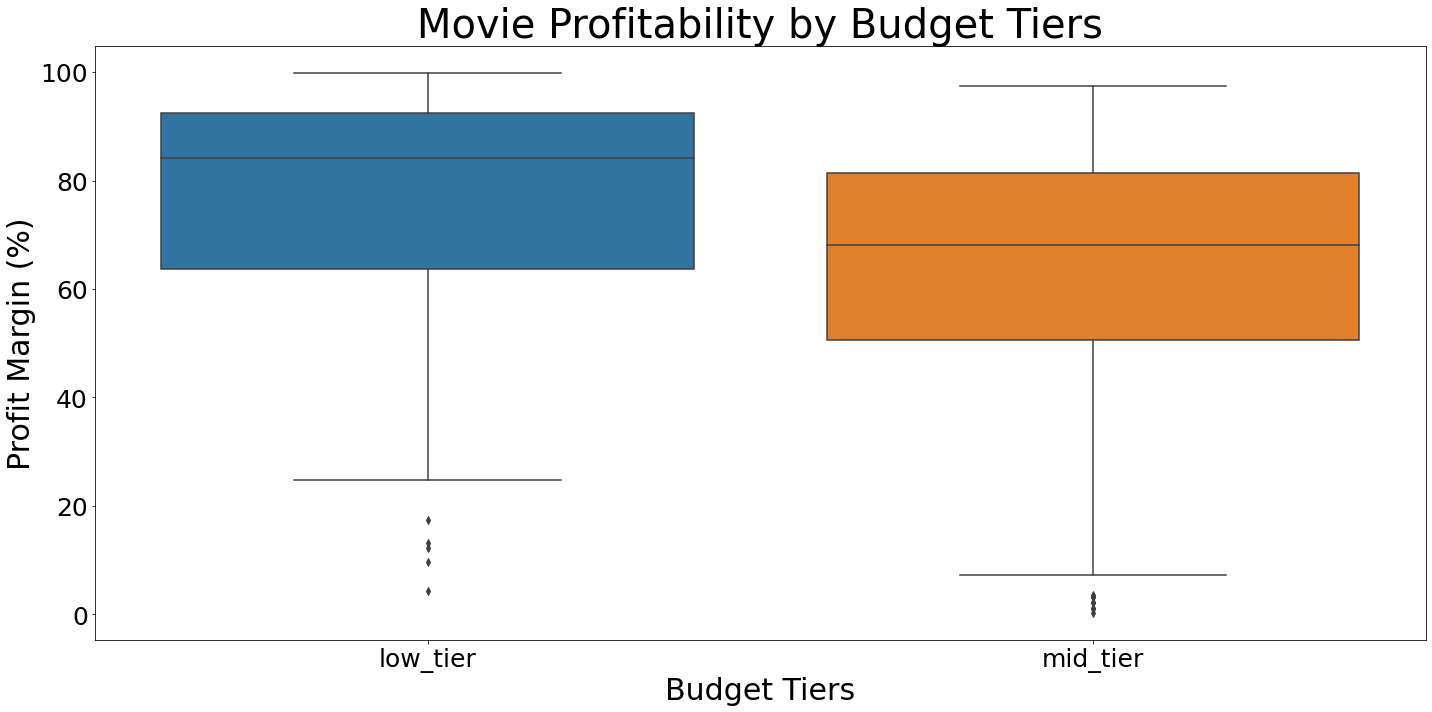

In [74]:
tiers = ['Low Tier', 'Mid Tier', 'High Tier']
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(x = 'budget_tier', y = 'profit_margin', 
            data = df2, orient = 'v')
ax.set_title('Movie Profitability by Budget Tiers', size = 40)
ax.set_xlabel('Budget Tiers', fontsize = 30)
ax.tick_params(labelsize = 25)
ax.set_ylabel('Profit Margin (%)', fontsize = 30)
plt.tight_layout()

This line of code is to remove movies genres in genre1 in low that just have too few movies as they skew the results of the groupbys, particulalrly movies with vaue counts under 10.

In [75]:
values = ['Fantasy', 'Animation', 'Crime']
low = low[low.genre1.isin(values) == False]

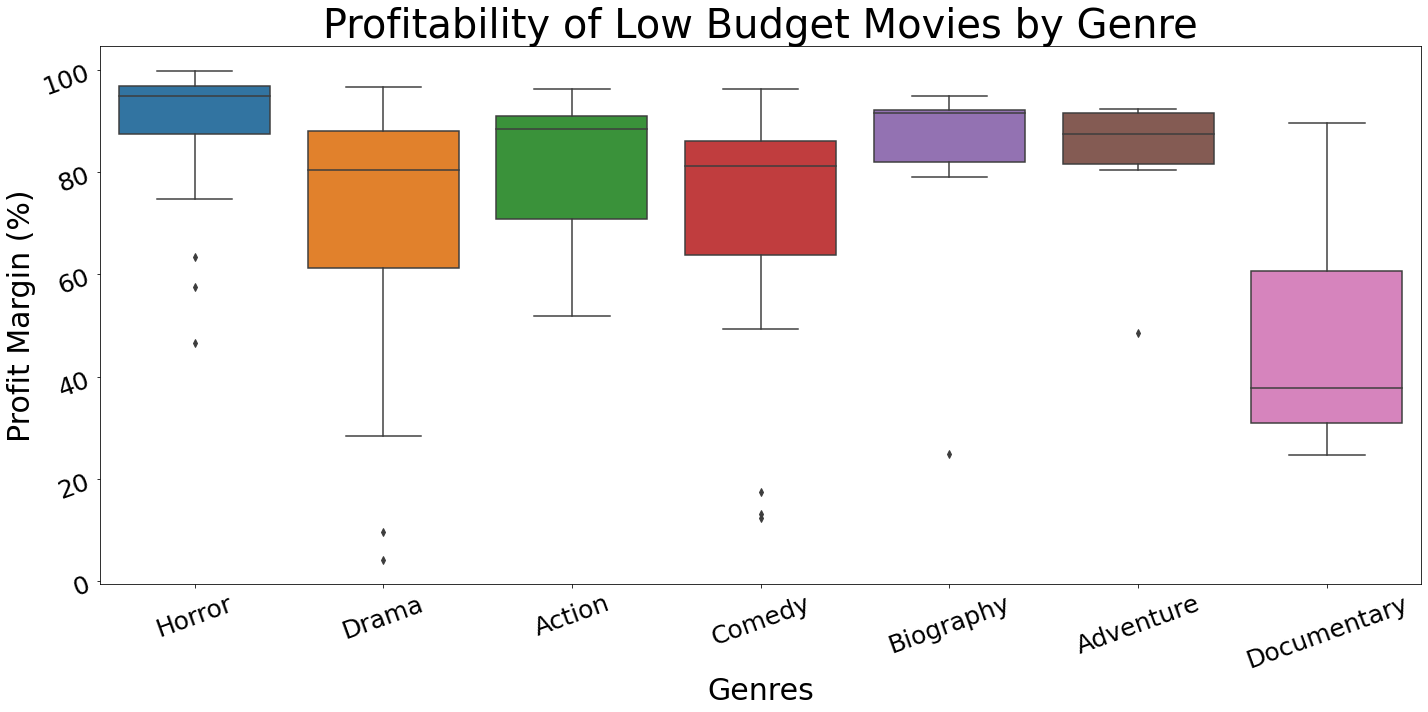

In [76]:
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(x = 'genre1', y = 'profit_margin', 
            data = low, orient = 'v')
ax.set_title('Profitability of Low Budget Movies by Genre', size = 40)
ax.set_xlabel('Genres', fontsize = 30)
ax.set_ylabel('Profit Margin (%)', fontsize = 30)
ax.tick_params(labelsize = 25, rotation = 20)
plt.tight_layout()

This visualization expalains the relationship between genre and profit margin in the low budget movie subset.

In [77]:
dl

genre1
Horror       1.162993e+08
Action       1.014371e+08
Adventure    9.158905e+07
Comedy       8.828258e+07
Drama        8.159496e+07
Name: worldwide_gross, dtype: float64

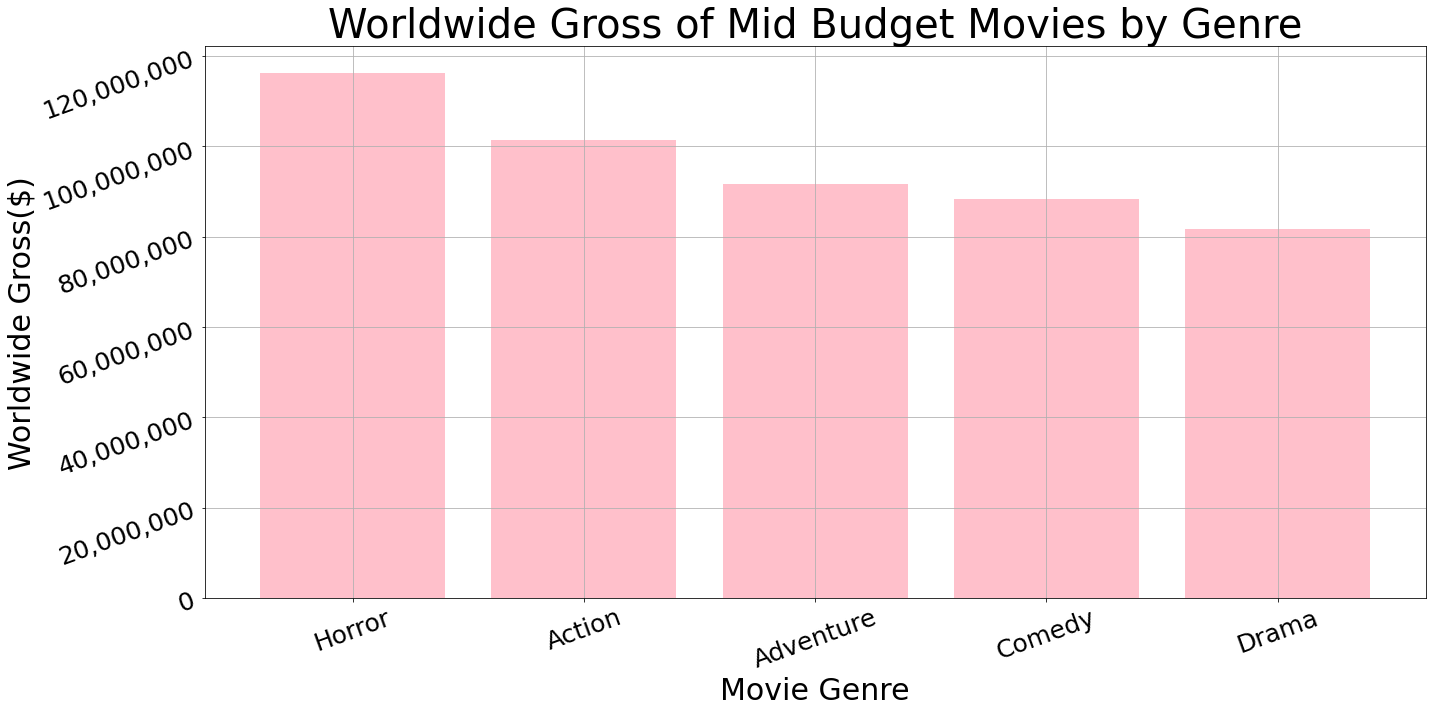

In [78]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(dl.keys(), dl, color = "pink")
ax.set_xlabel('Movie Genre', fontsize = 30)
ax.tick_params(labelsize = 25, rotation = 20)
ax.set_ylabel("Worldwide Gross($)", fontsize = 30)
ax.set_title('Worldwide Gross of Mid Budget Movies by Genre', fontsize = 40)
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.tight_layout()

In [79]:
dg = mid.groupby("genre1").mean().sort_values(by="worldwide_gross", ascending=False).head(20)
dg= dg ['worldwide_gross'].tail(10)
dg

genre1
Horror         1.162993e+08
Action         1.014371e+08
Adventure      9.158905e+07
Comedy         8.828258e+07
Drama          8.159496e+07
Biography      8.116291e+07
Crime          6.831554e+07
Documentary    6.623146e+07
Fantasy        6.289561e+07
Thriller       4.149521e+07
Name: worldwide_gross, dtype: float64

This code explains the relationshuo between movie genre and worldwide profit in the mid tier budget.

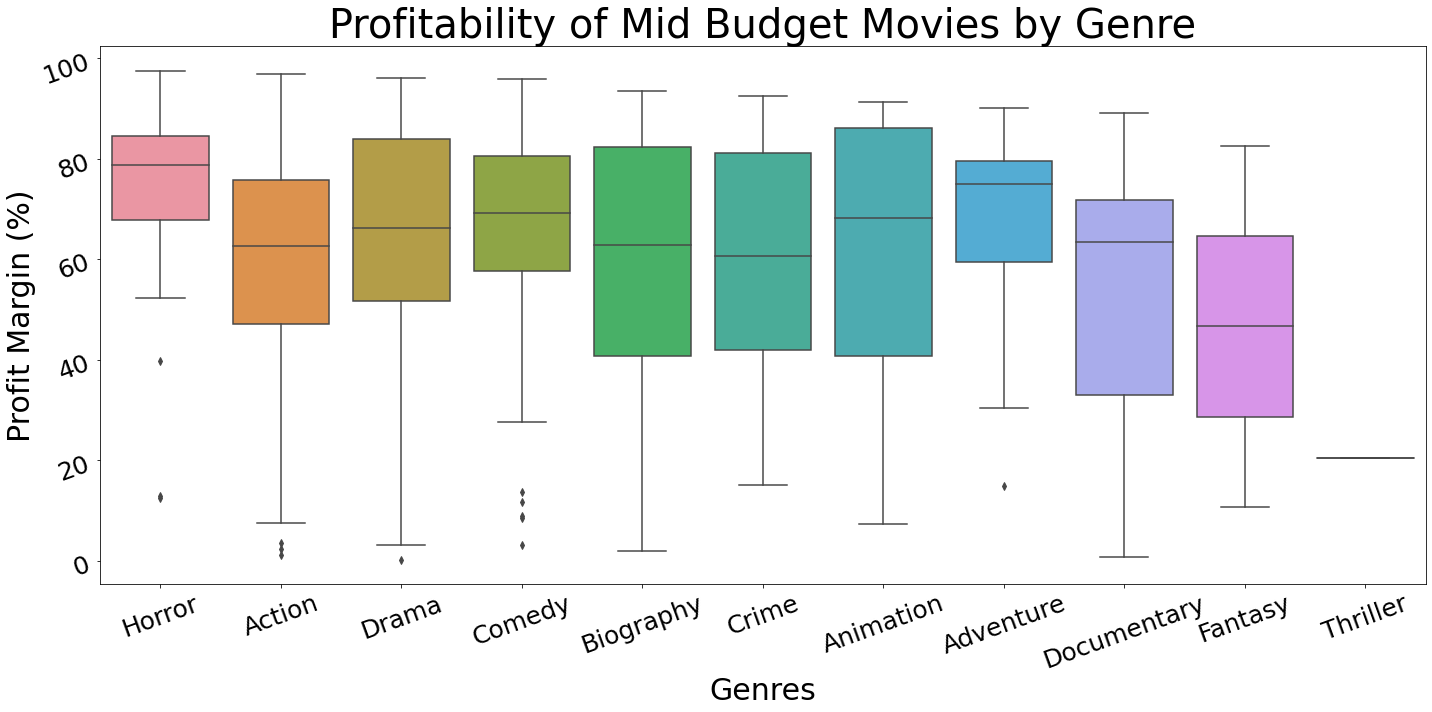

In [80]:
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(x = 'genre1', y = 'profit_margin', 
            data = mid, orient = 'v')
ax.set_title('Profitability of Mid Budget Movies by Genre', size = 40)
ax.set_xlabel('Genres', fontsize = 30)
ax.set_ylabel('Profit Margin (%)', fontsize = 30)
ax.tick_params(labelsize = 25, rotation = 20)
plt.tight_layout()

As we can see, Horror is slightly higher in terms of profit margins, but Action is in line with the other genres, so a different graph needds to be used to make the point that action and horror are the best genres to pick for a mid budget movie.

Below are all the visualization I used in my presentation that I created based on my groupbys and other data wrangling.

In [81]:
xw = xw['profit_margin'].head(10)
xw

director
Travis Cluff          99.759941
William Brent Bell    99.017291
Levan Gabriadze       98.446341
Robbie Walsh          98.207659
Jordan Peele          98.042041
Jill Wong             97.700991
Bradley Parker        97.642161
James DeMonaco        96.712926
Fabrice Gobert        96.639932
Scott Derrickson      96.580332
Name: profit_margin, dtype: float64

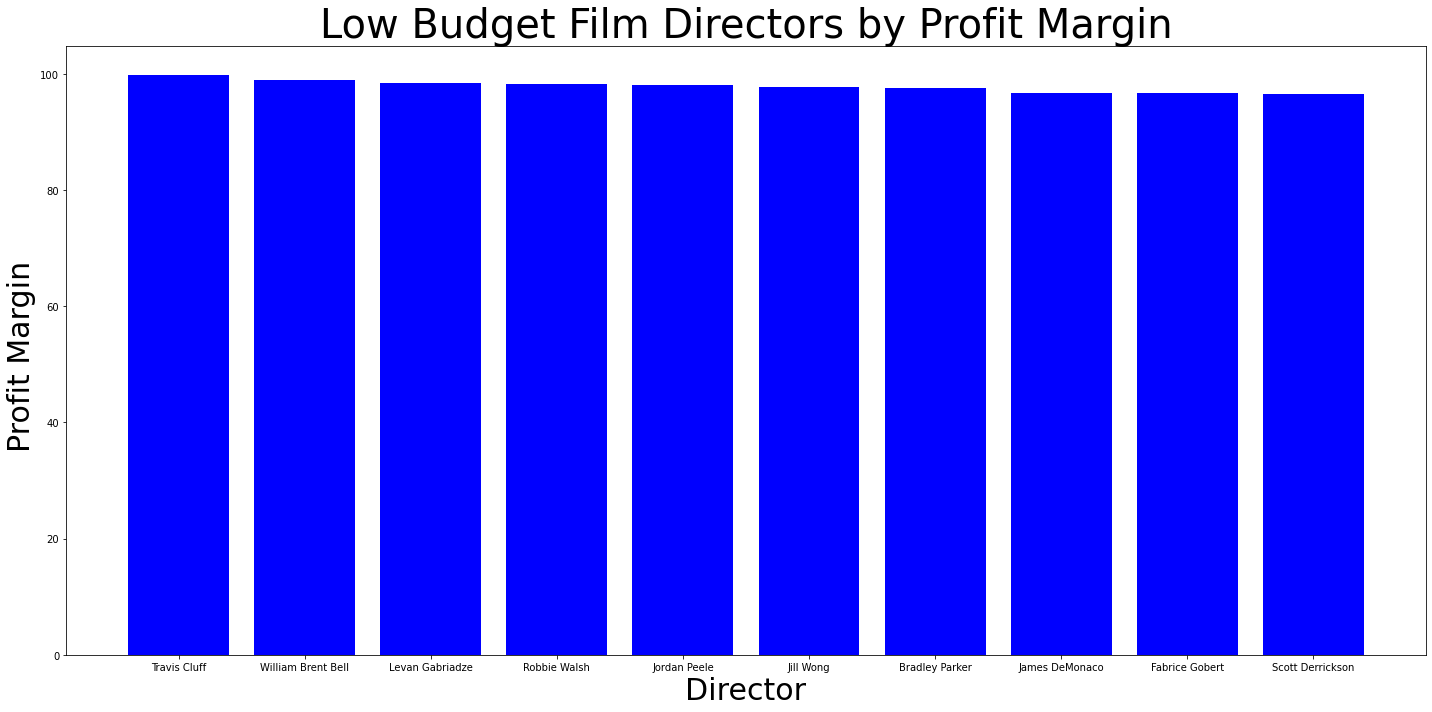

In [82]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(xw.keys(), xw, color = "blue")
ax.set_xlabel('Director', fontsize = 30)
ax.set_ylabel("Profit Margin ", fontsize = 30)
ax.set_title('Low Budget Film Directors by Profit Margin', fontsize = 40)
plt.tight_layout()

In [83]:
xy =  low.groupby("director").sum().sort_values(by="worldwide_gross", ascending=False).head(20)
xy =xy['worldwide_gross'].head()
xy

director
Jordan Peele          255367951.0
Christopher Landon    215915114.0
Fabrice Gobert        148806510.0
Ariel Schulman        142817992.0
Dan Trachtenberg      108286422.0
Name: worldwide_gross, dtype: float64

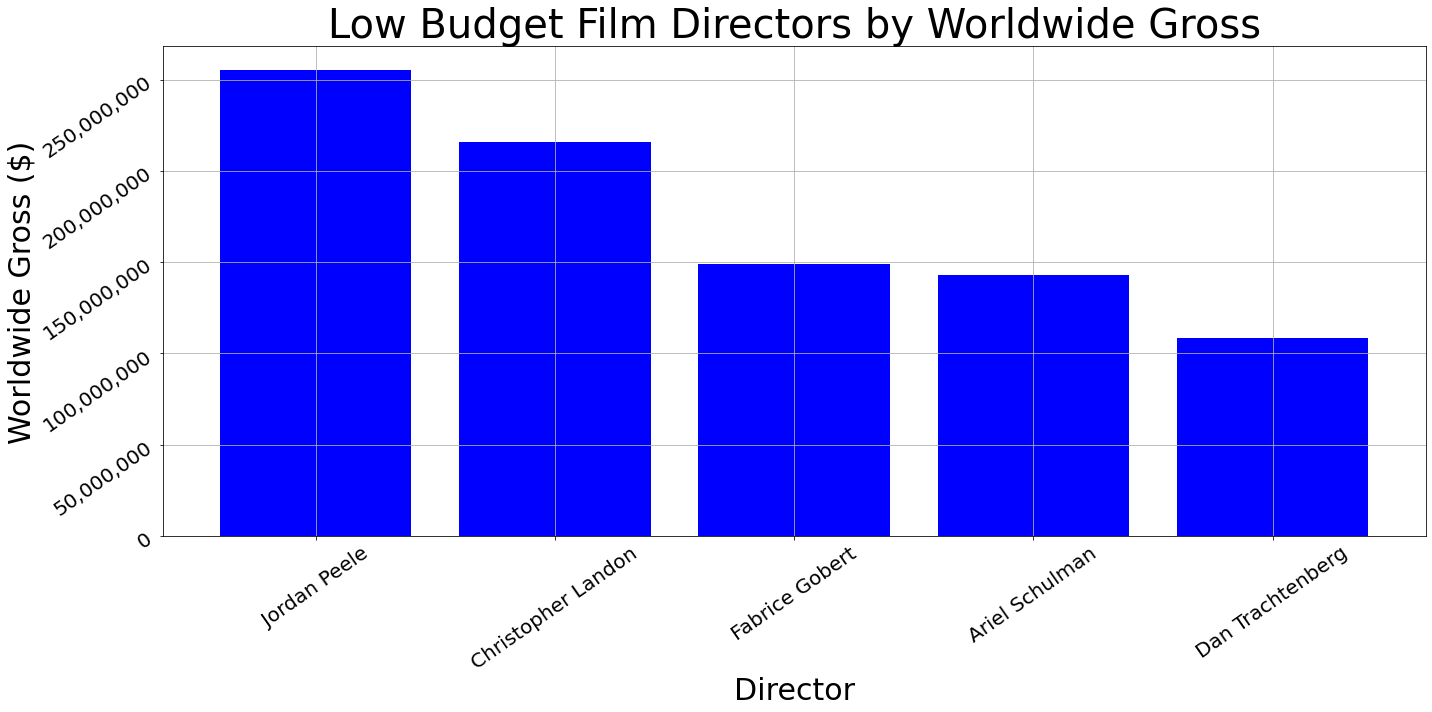

In [84]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(xy.keys(), xy, color = "blue")
ax.set_xlabel('Director', fontsize = 30)
ax.set_ylabel("Worldwide Gross ($)", fontsize = 30)
ax.tick_params(labelsize = 20, rotation = 35)
ax.set_title('Low Budget Film Directors by Worldwide Gross', fontsize = 40)
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.tight_layout()

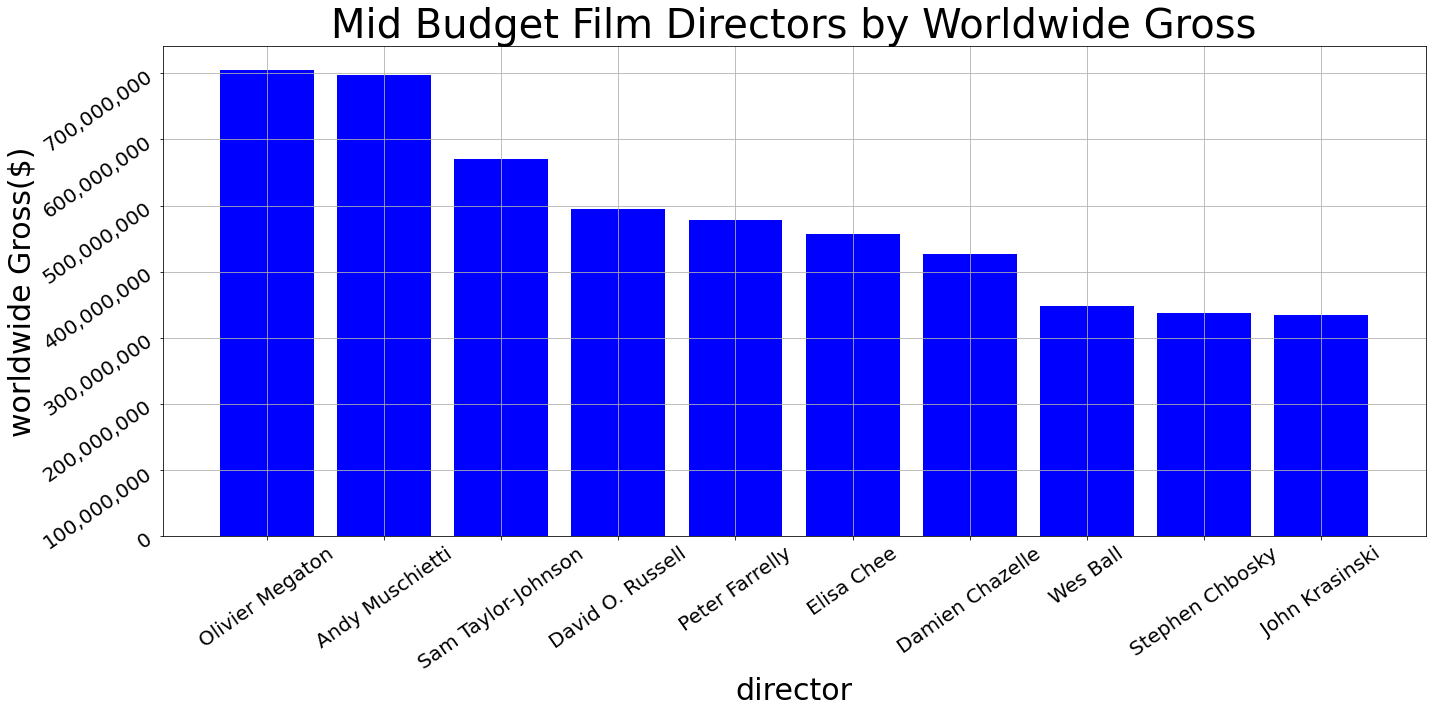

In [85]:
xn =  mid.groupby("director").sum().sort_values(by="worldwide_gross", ascending=False).head(20)
xn = xn['worldwide_gross'].head(10)
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(xn.keys(), xn, color = "blue")
ax.set_xlabel('director', fontsize = 30)
ax.set_ylabel("worldwide Gross($)", fontsize = 30)
ax.tick_params(labelsize = 20, rotation = 35)
ax.set_title('Mid Budget Film Directors by Worldwide Gross', fontsize = 40)
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.tight_layout()

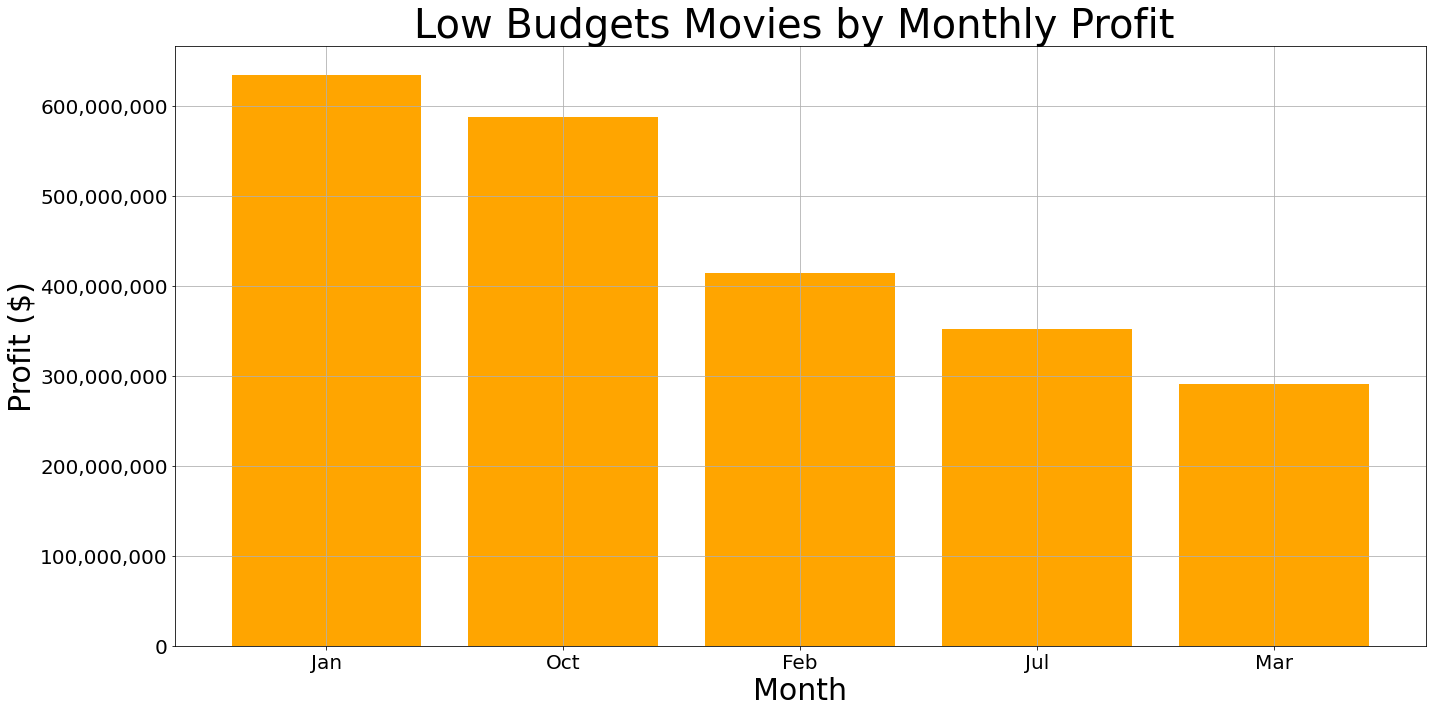

In [86]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(xd.keys(), xd, color = "orange")
ax.set_xlabel('Month', fontsize = 30)
ax.set_ylabel("Profit ($)", fontsize = 30)
ax.tick_params(labelsize = 20)
ax.set_title('Low Budgets Movies by Monthly Profit ', fontsize = 40)
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.tight_layout()

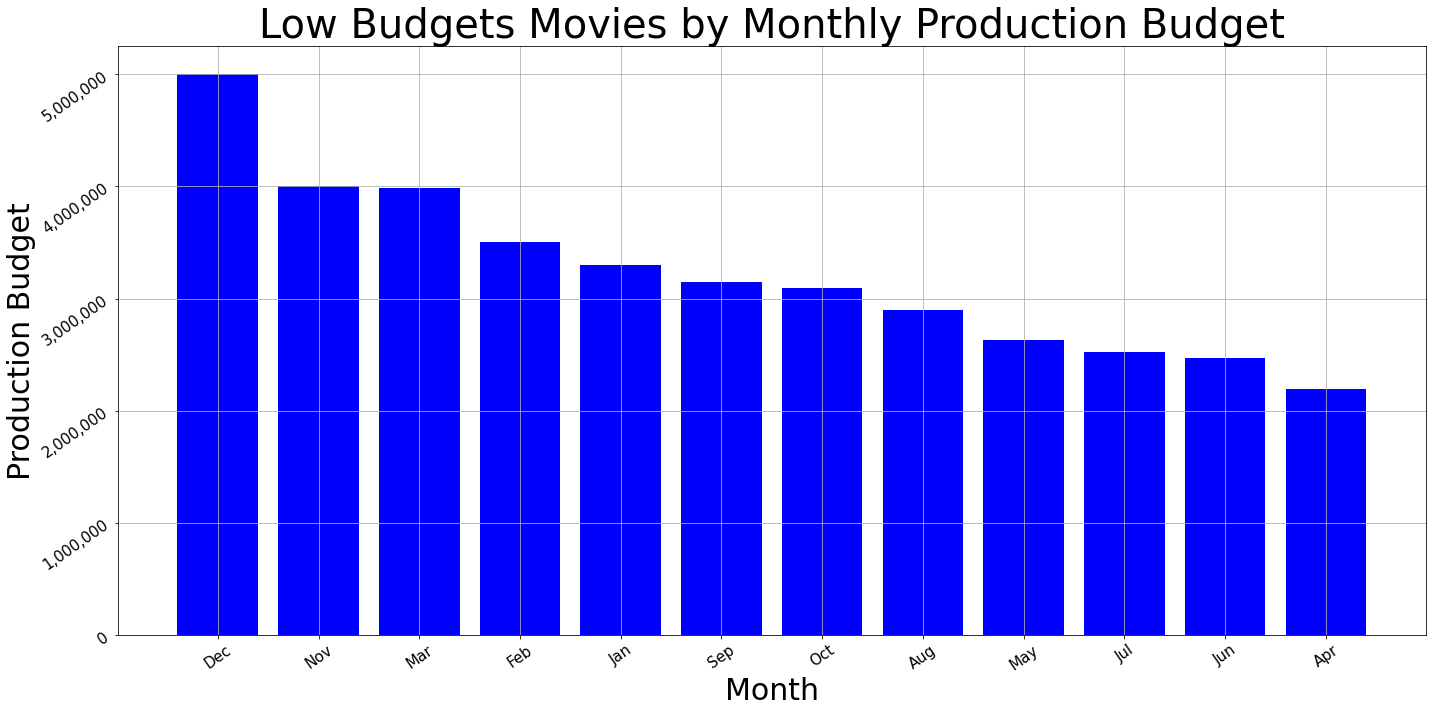

In [87]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(xc.keys(), xc, color = "blue")
ax.set_xlabel('Month', fontsize = 30)
ax.set_ylabel("Production Budget", fontsize = 30)
ax.tick_params(labelsize = 15, rotation = 35)
ax.set_title('Low Budgets Movies by Monthly Production Budget', fontsize = 40)
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.tight_layout()

In [88]:
tr = mid.groupby("release_month").sum().sort_values(by="profit", ascending=False)
tr = tr['profit'].head()
tr

release_month
Nov    3.526759e+09
Dec    2.902206e+09
Jul    2.620576e+09
Oct    2.521101e+09
Sep    2.384098e+09
Name: profit, dtype: float64

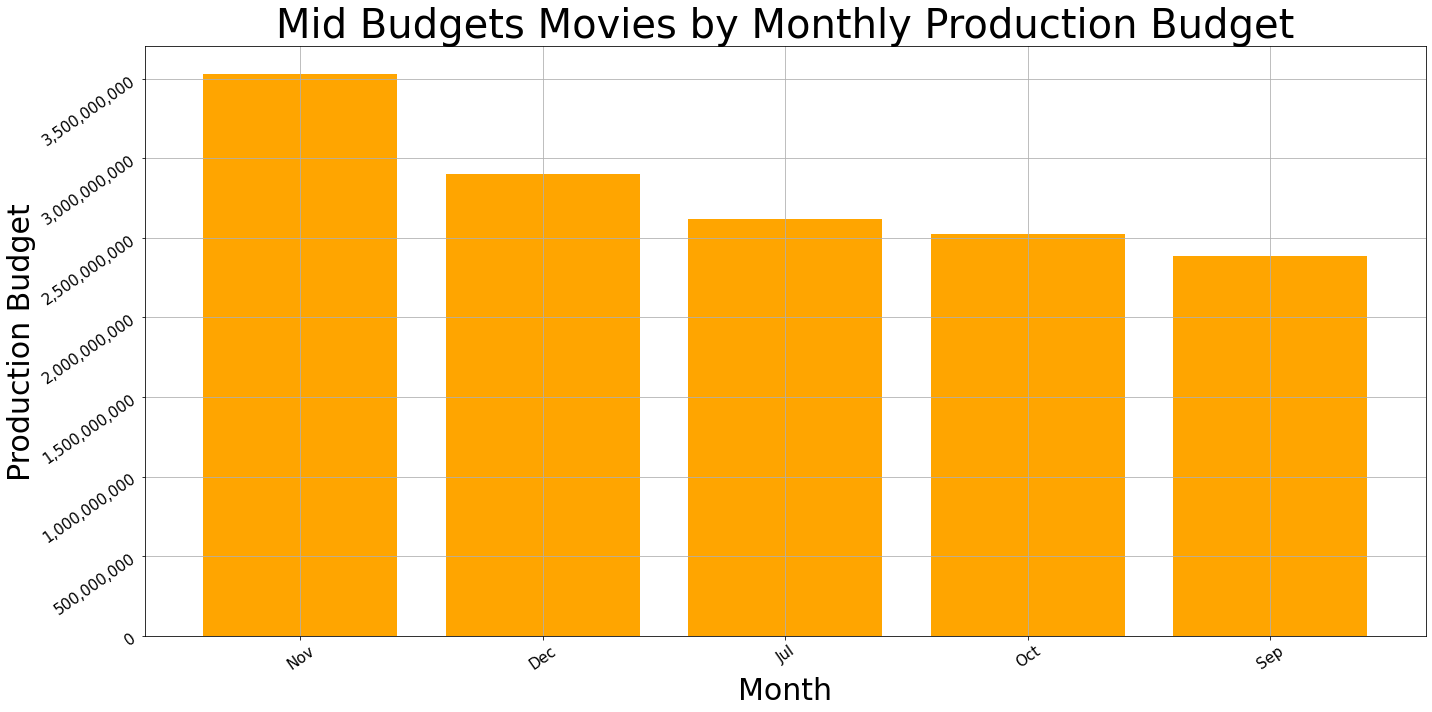

In [89]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(tr.keys(), tr, color = "orange")
ax.set_xlabel('Month', fontsize = 30)
ax.set_ylabel("Production Budget", fontsize = 30)
ax.tick_params(labelsize = 15, rotation = 35)
ax.set_title('Mid Budgets Movies by Monthly Production Budget', fontsize = 40)
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.tight_layout()

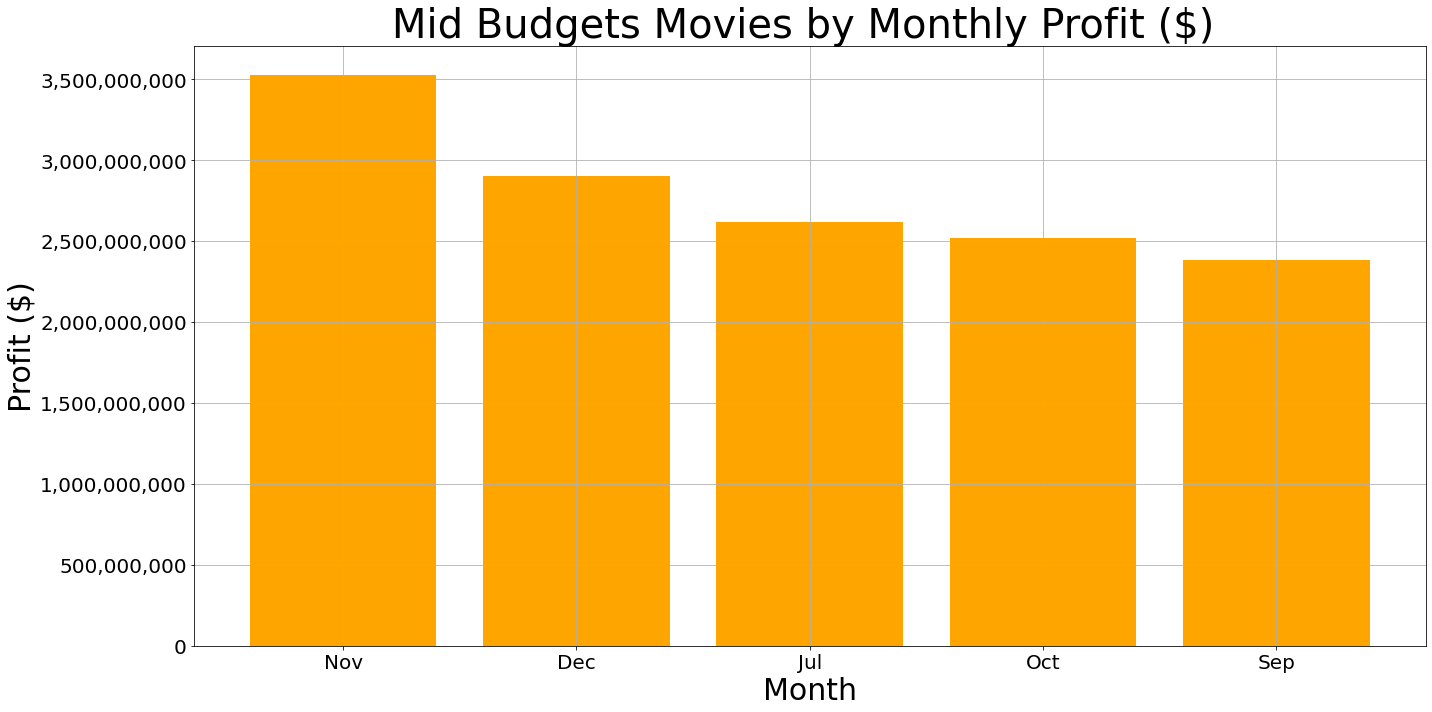

In [90]:
ty = mid.groupby("release_month").sum().sort_values(by="profit", ascending=False).head(5)
ty = ty['profit']
ty
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(ty.keys(), ty, color = "orange")
ax.set_xlabel('Month', fontsize = 30)
ax.set_ylabel("Profit ($)", fontsize = 30)
ax.tick_params(labelsize = 20)
ax.set_title('Mid Budgets Movies by Monthly Profit ($) ', fontsize = 40)
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.tight_layout()